# Проект по моделям машинного обучения с учителем (supervised learning) - Методы на основе деревьев





------
------

## ЦЕЛЬ: Создать модель предсказания того, уйдёт ли абонент в отток (churn).

----
----




## Импортируем библиотеки и загружаем данные


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Общие характеристики данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Исследование данных (Exploratory Data Analysis)

## Исследование признаков


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**График CountPlot для проверки сбалансированности значений колонки с классами (Churn).**

<Axes: xlabel='Churn', ylabel='count'>

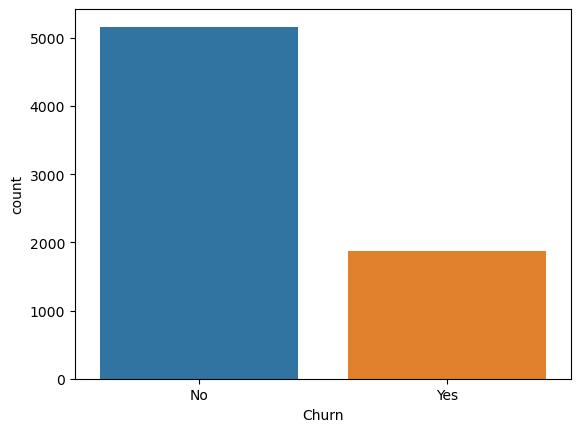

In [7]:
sns.countplot(data=df, x='Churn')

**Исследование распределения колонки TotalCharges по различным категориям Churn с помощью графика Box Plot или Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

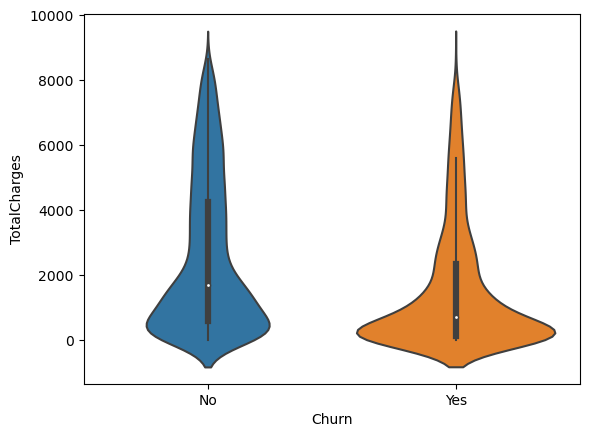

In [8]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

**График boxplot с распределением колонки TotalCharges для различных типов контрактов.**

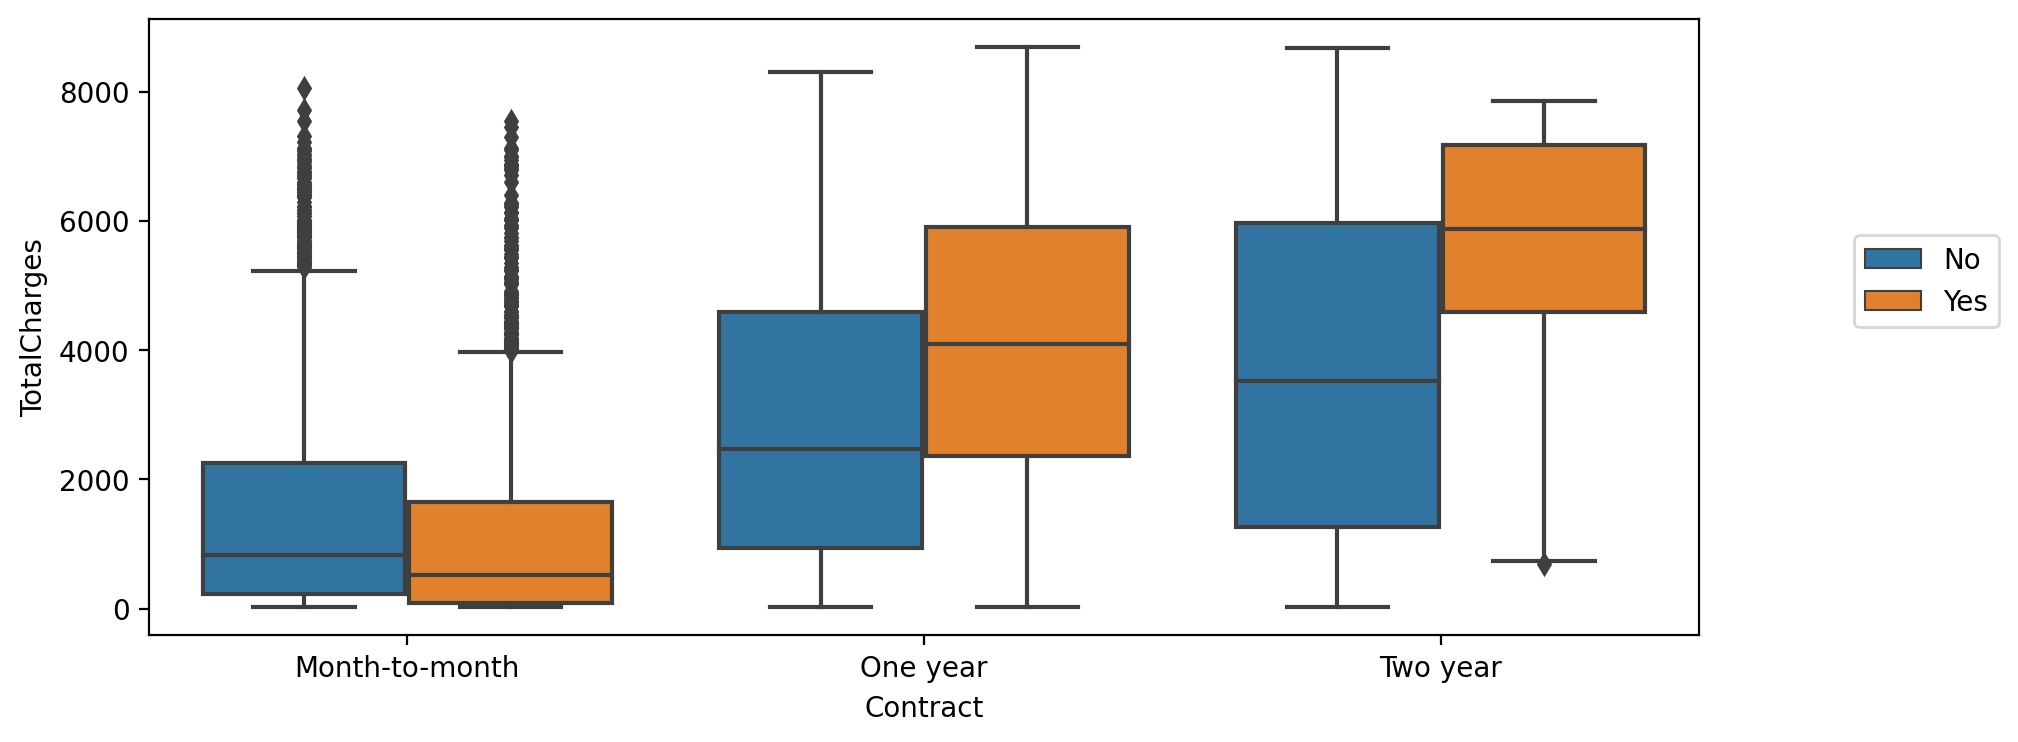

In [9]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=(1.1,0.5))

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [12]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

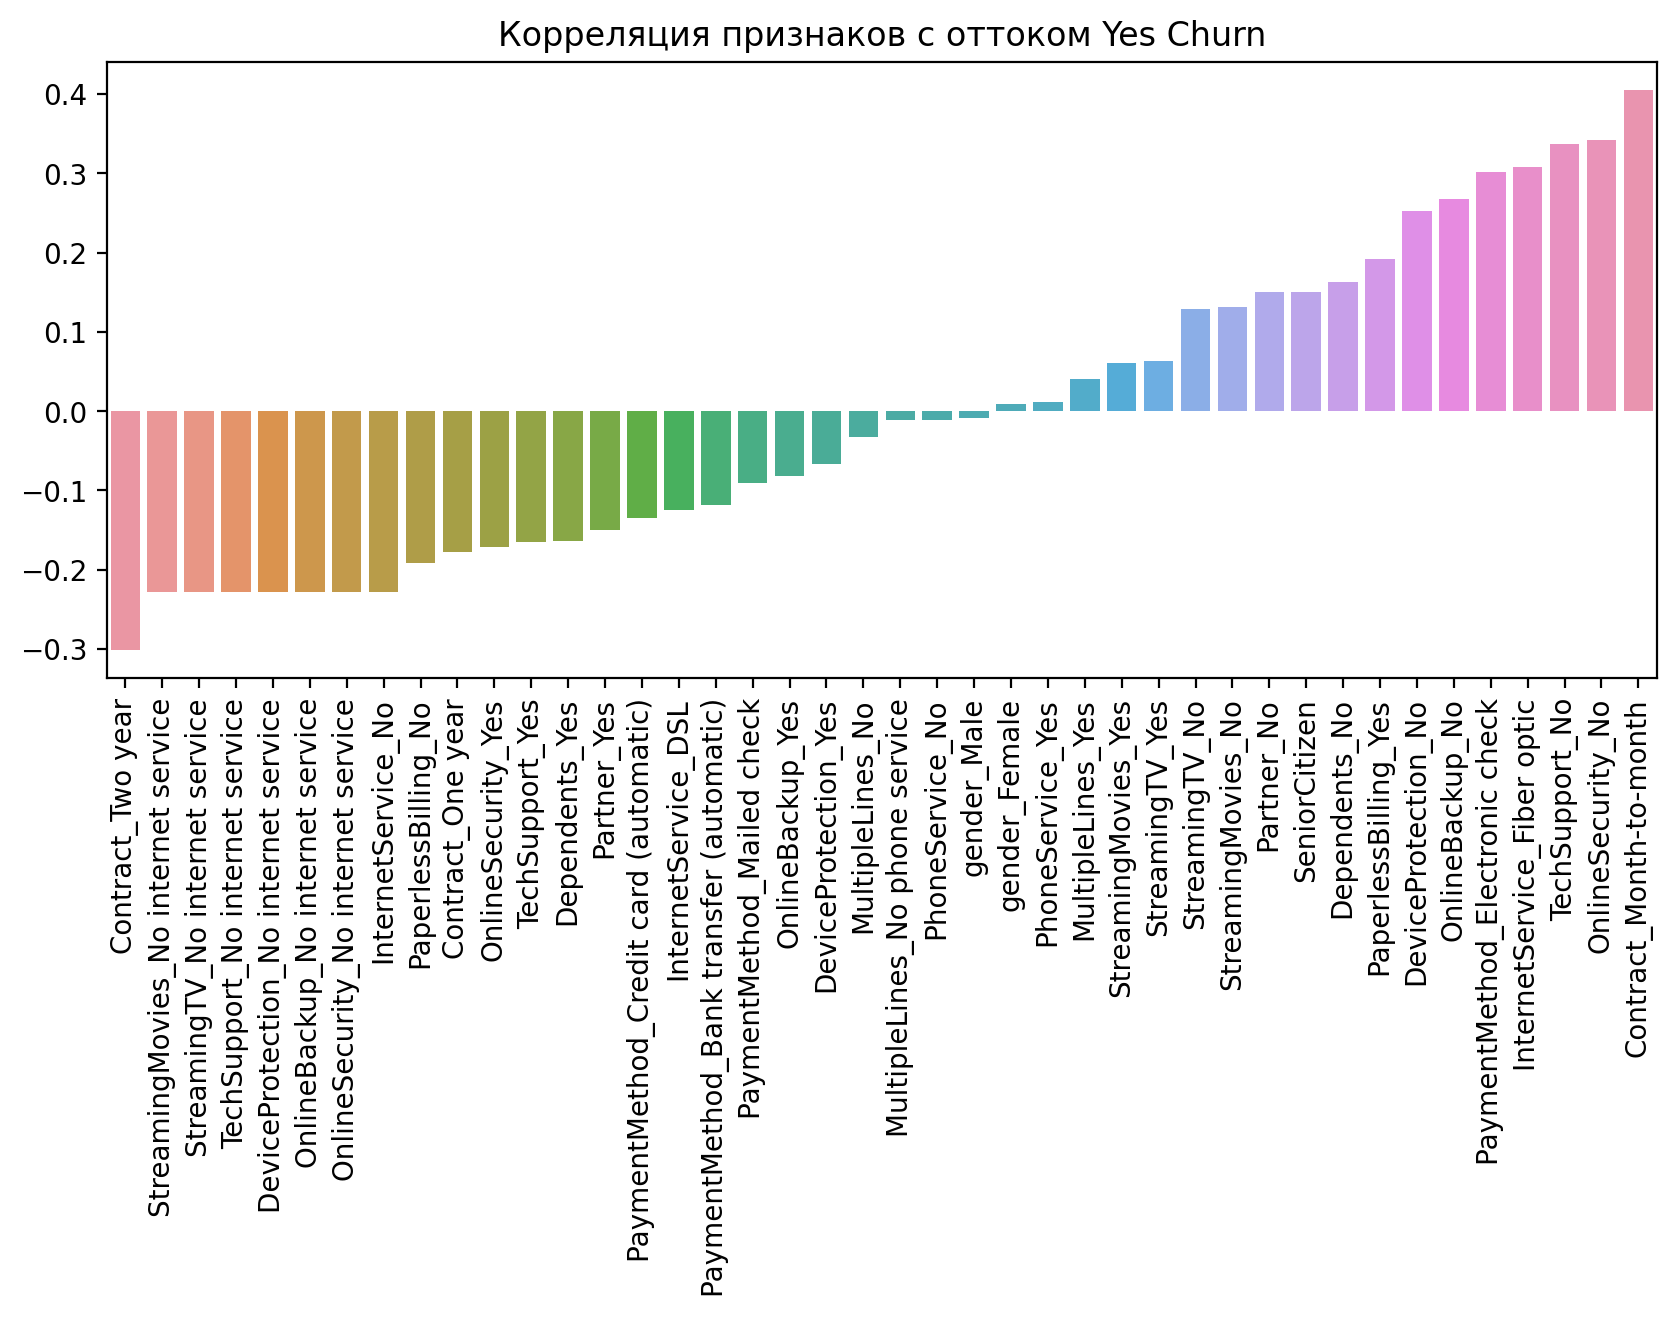

In [14]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Корреляция признаков с оттоком Yes Churn")
plt.xticks(rotation=90);

---
---

# Анализ оттока


**3 типа контракта.**

In [15]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Ггистограмма с распределением значений колонки tenure - это количество месяцев, сколько времени человек является абонентом компании.**

<Axes: xlabel='tenure', ylabel='Count'>

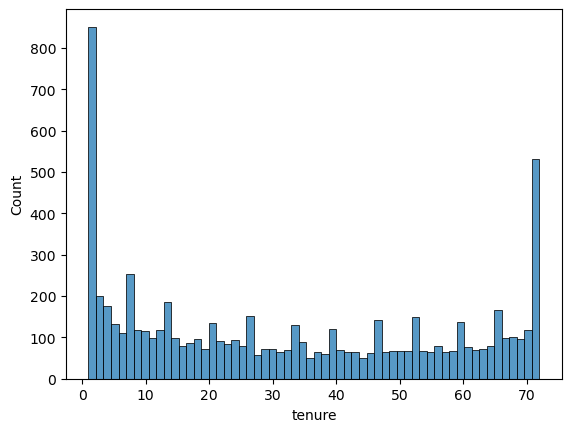

In [16]:
sns.histplot(data=df,x='tenure',bins=60)

**Гистограммы для колонки tenure, разбивая данные по двум колонкам - Churn и Contract.**

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


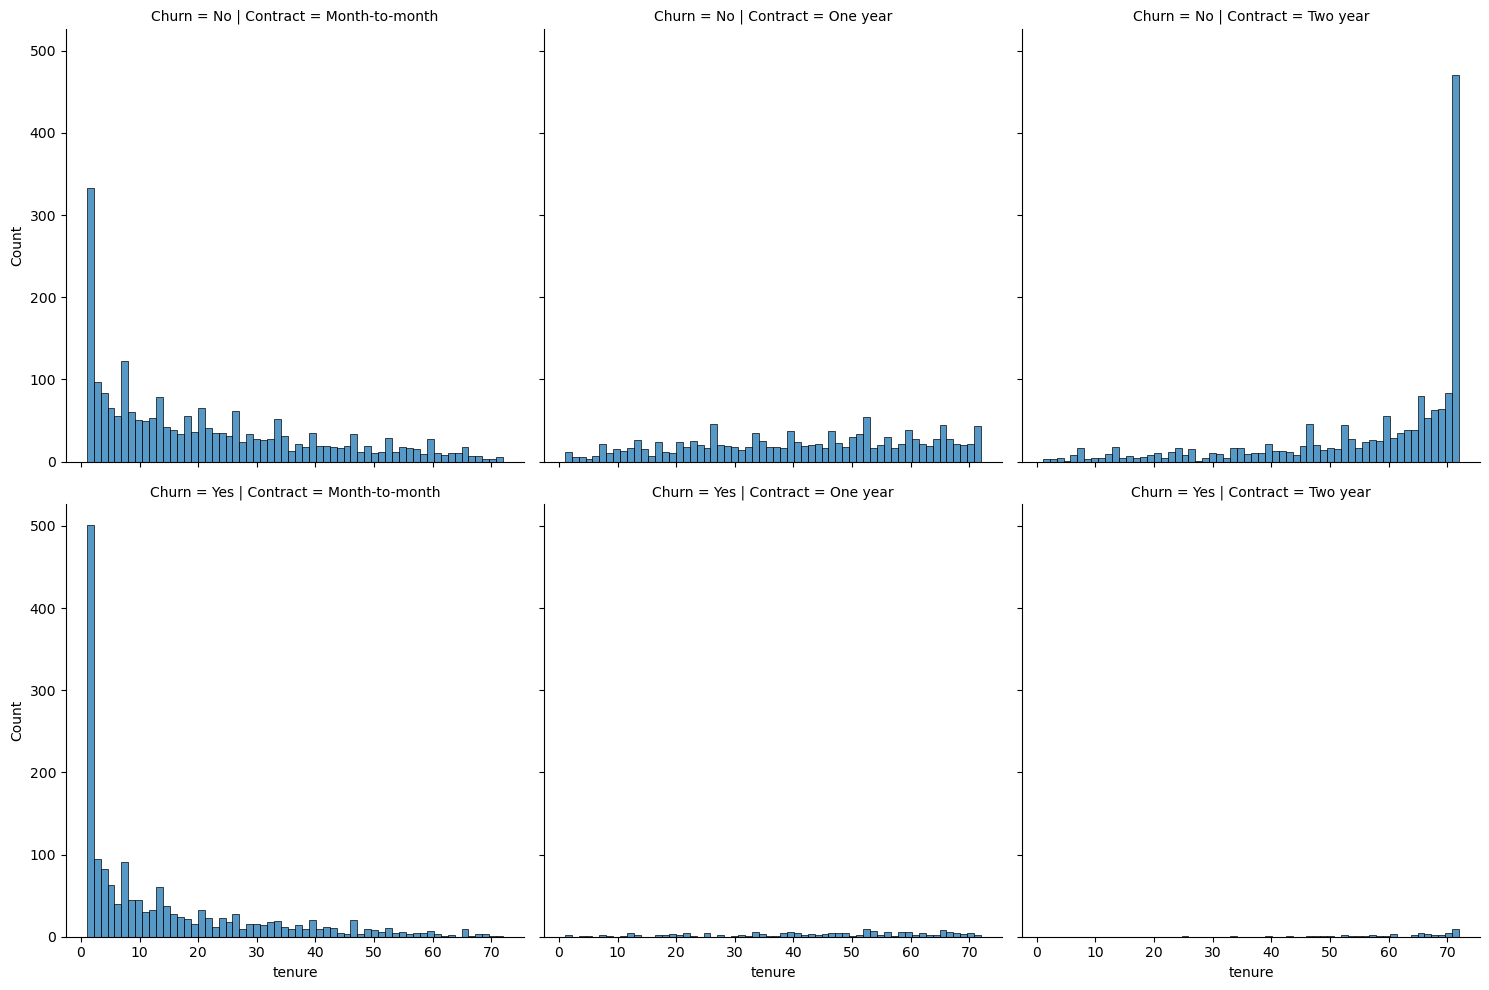

In [17]:
sns.displot(data=df, x='tenure',bins=60,col='Contract',row='Churn')

**График scatterplot для колонок Total Charges и Monthly Charges.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

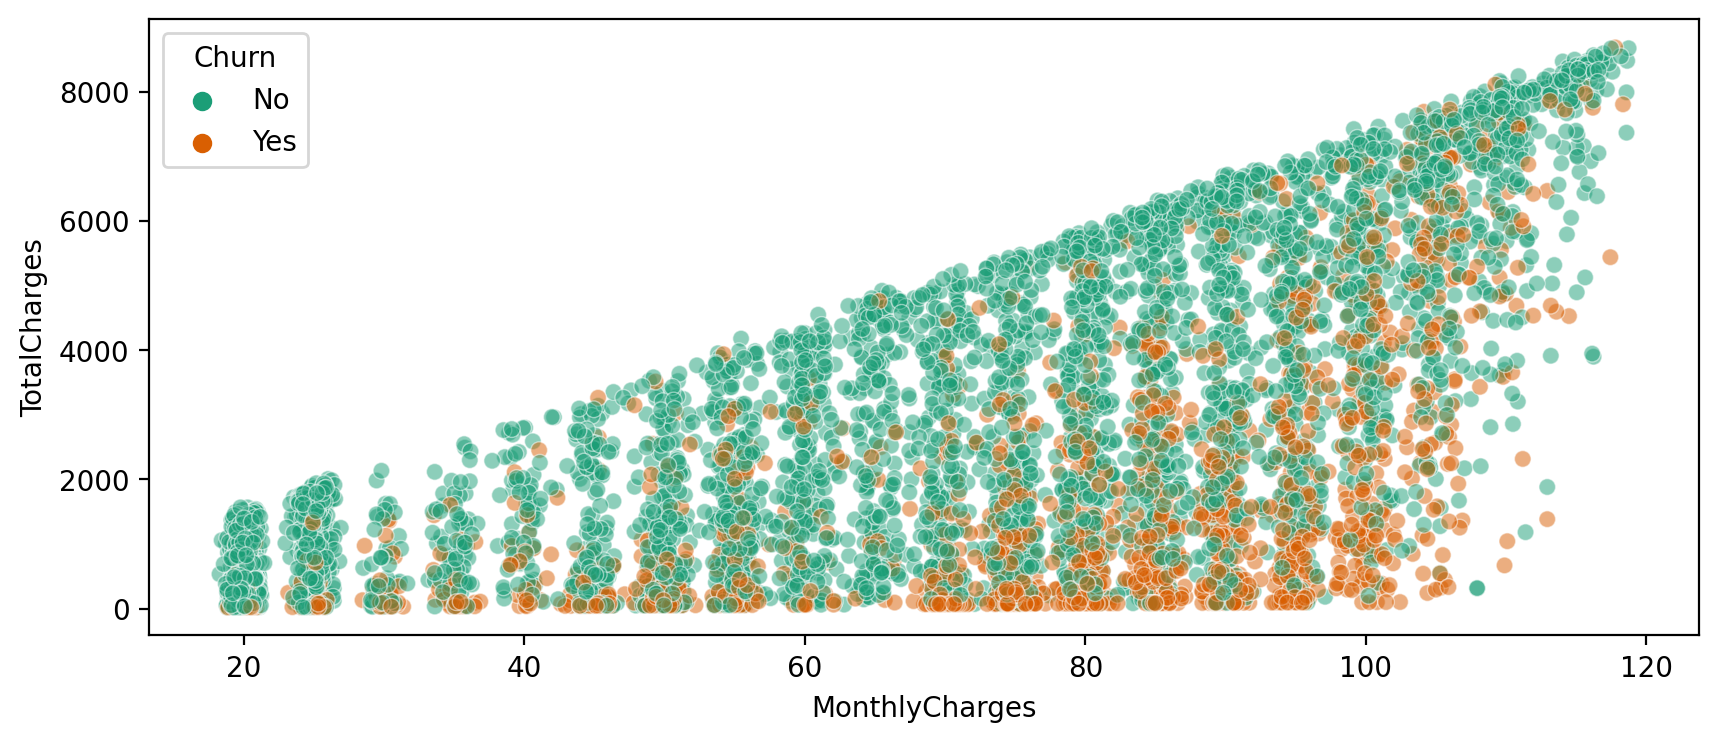

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',palette='Dark2',linewidth=0.5,alpha=0.5)

### Создание когорт (сегментов) по колонке Tenure

In [19]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

In [20]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [21]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**Используя результаты, построен график процента оттока для различных значений tenure.**

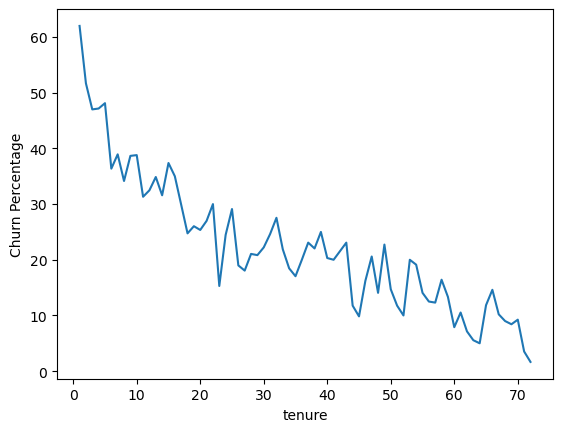

In [22]:
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Более крупные когорты (сегменты)

   * '0-12 месяцев'
   * '24-48 месяцев'
   * '12-24 месяцев'
   * 'Более 48 месяцев'    

In [23]:
def tenure_cohort(tenure):
    if tenure <= 12:
        return '0-12 месяцев'
    elif 12 < tenure <= 24:
        return '12-24 месяцев'
    elif 24 < tenure <= 48:
        return '24-48 месяцев'
    else:
        return 'Более 48 месяцев'

In [24]:
df['Tenure Cohort'] = df['tenure'].apply(tenure_cohort)

In [25]:
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 месяцев
1,34,24-48 месяцев
2,2,0-12 месяцев
3,45,24-48 месяцев
4,2,0-12 месяцев
...,...,...
7027,24,12-24 месяцев
7028,72,Более 48 месяцев
7029,11,0-12 месяцев
7030,4,0-12 месяцев


**График scatterplot для Total Charges и Monthly Charts.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

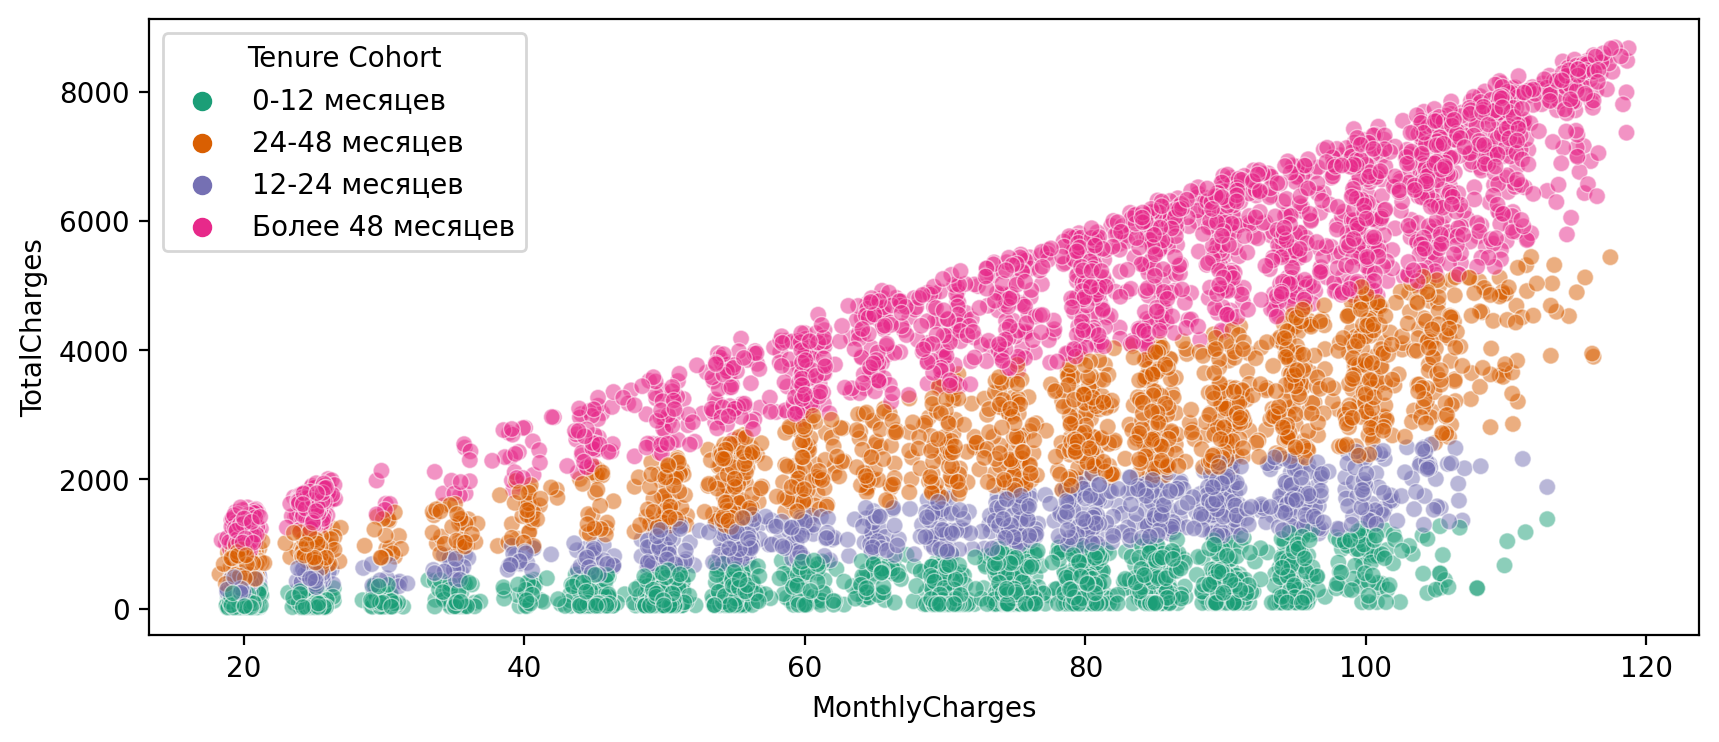

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure Cohort',palette='Dark2',linewidth=0.5,alpha=0.5)

**График countplot с количеством ушедших и не ушедших в отток людей в каждой когорте.**

<Axes: xlabel='Tenure Cohort', ylabel='count'>

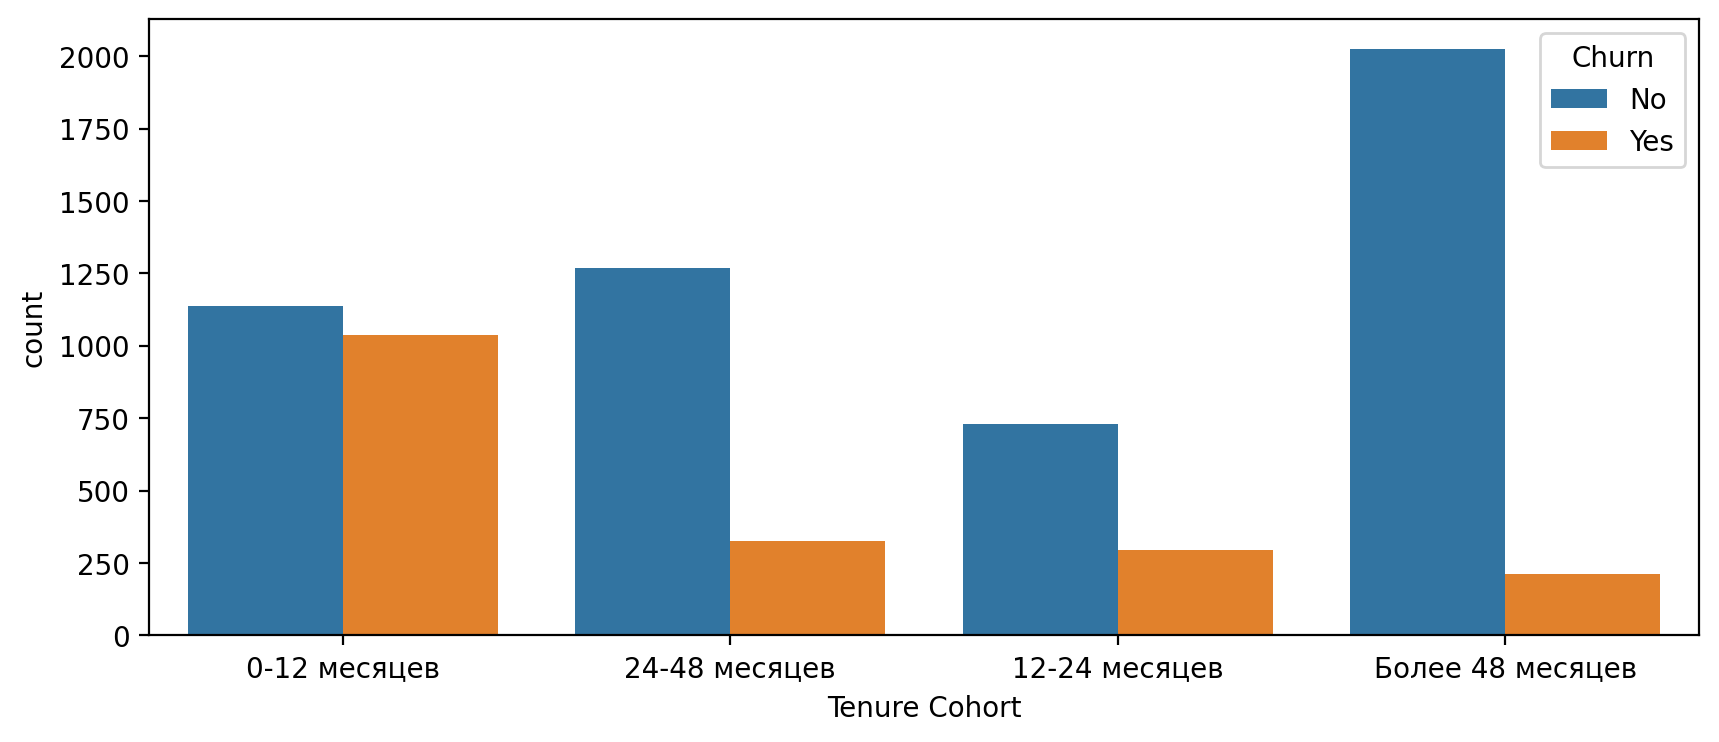

In [27]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue="Churn")

**Набор графиков CountPlot с количеством людей по различным когортам Tenure Cohort. Для каждого типа контракта отдельный график.**

E:\ANACONDA\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x800 with 0 Axes>

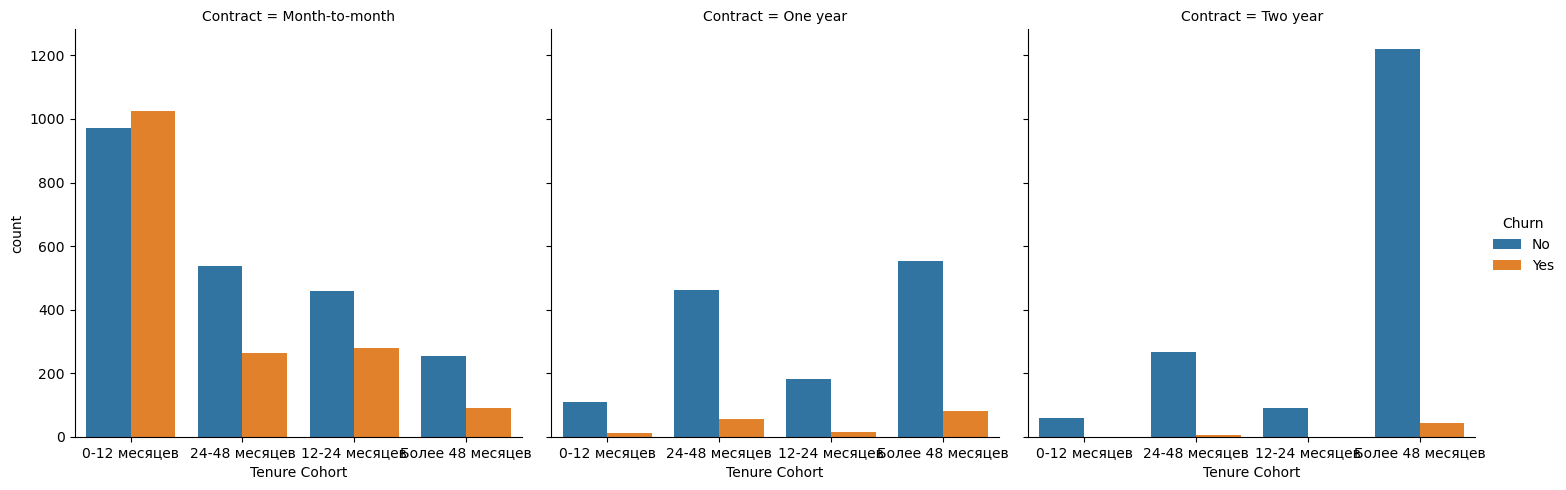

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count');

-----

# Часть 4: Предиктивная модель


## Одно дерево решений (Decision Tree)

**Разделение всех данных на признаки X и целевую переменную Y.**

In [29]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [30]:
y = df['Churn']

**Разбиение данных на обучающий и тестовый наборы (train test split), откладывая в сторону 10% данных для тестирования.**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
model = DecisionTreeClassifier(max_depth=6)

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [36]:
base_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [38]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.80       704



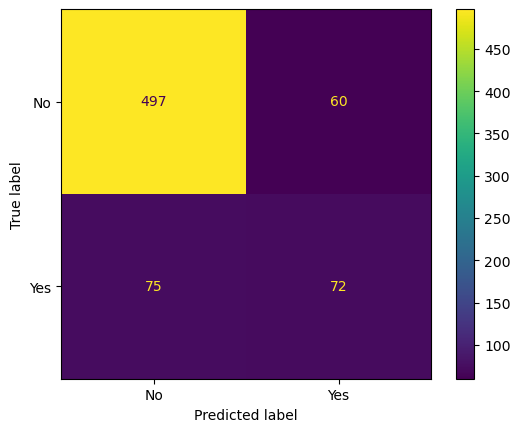

In [39]:
cm = confusion_matrix(y_test, base_pred)
display_labels = ["No", "Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=display_labels)
disp.plot()

In [93]:
feature_importances = model.feature_importances_

In [94]:
imp_feats = pd.DataFrame(data=feature_importances, index=X.columns, columns=['Feature Importance']).sort_values("Feature Importance")


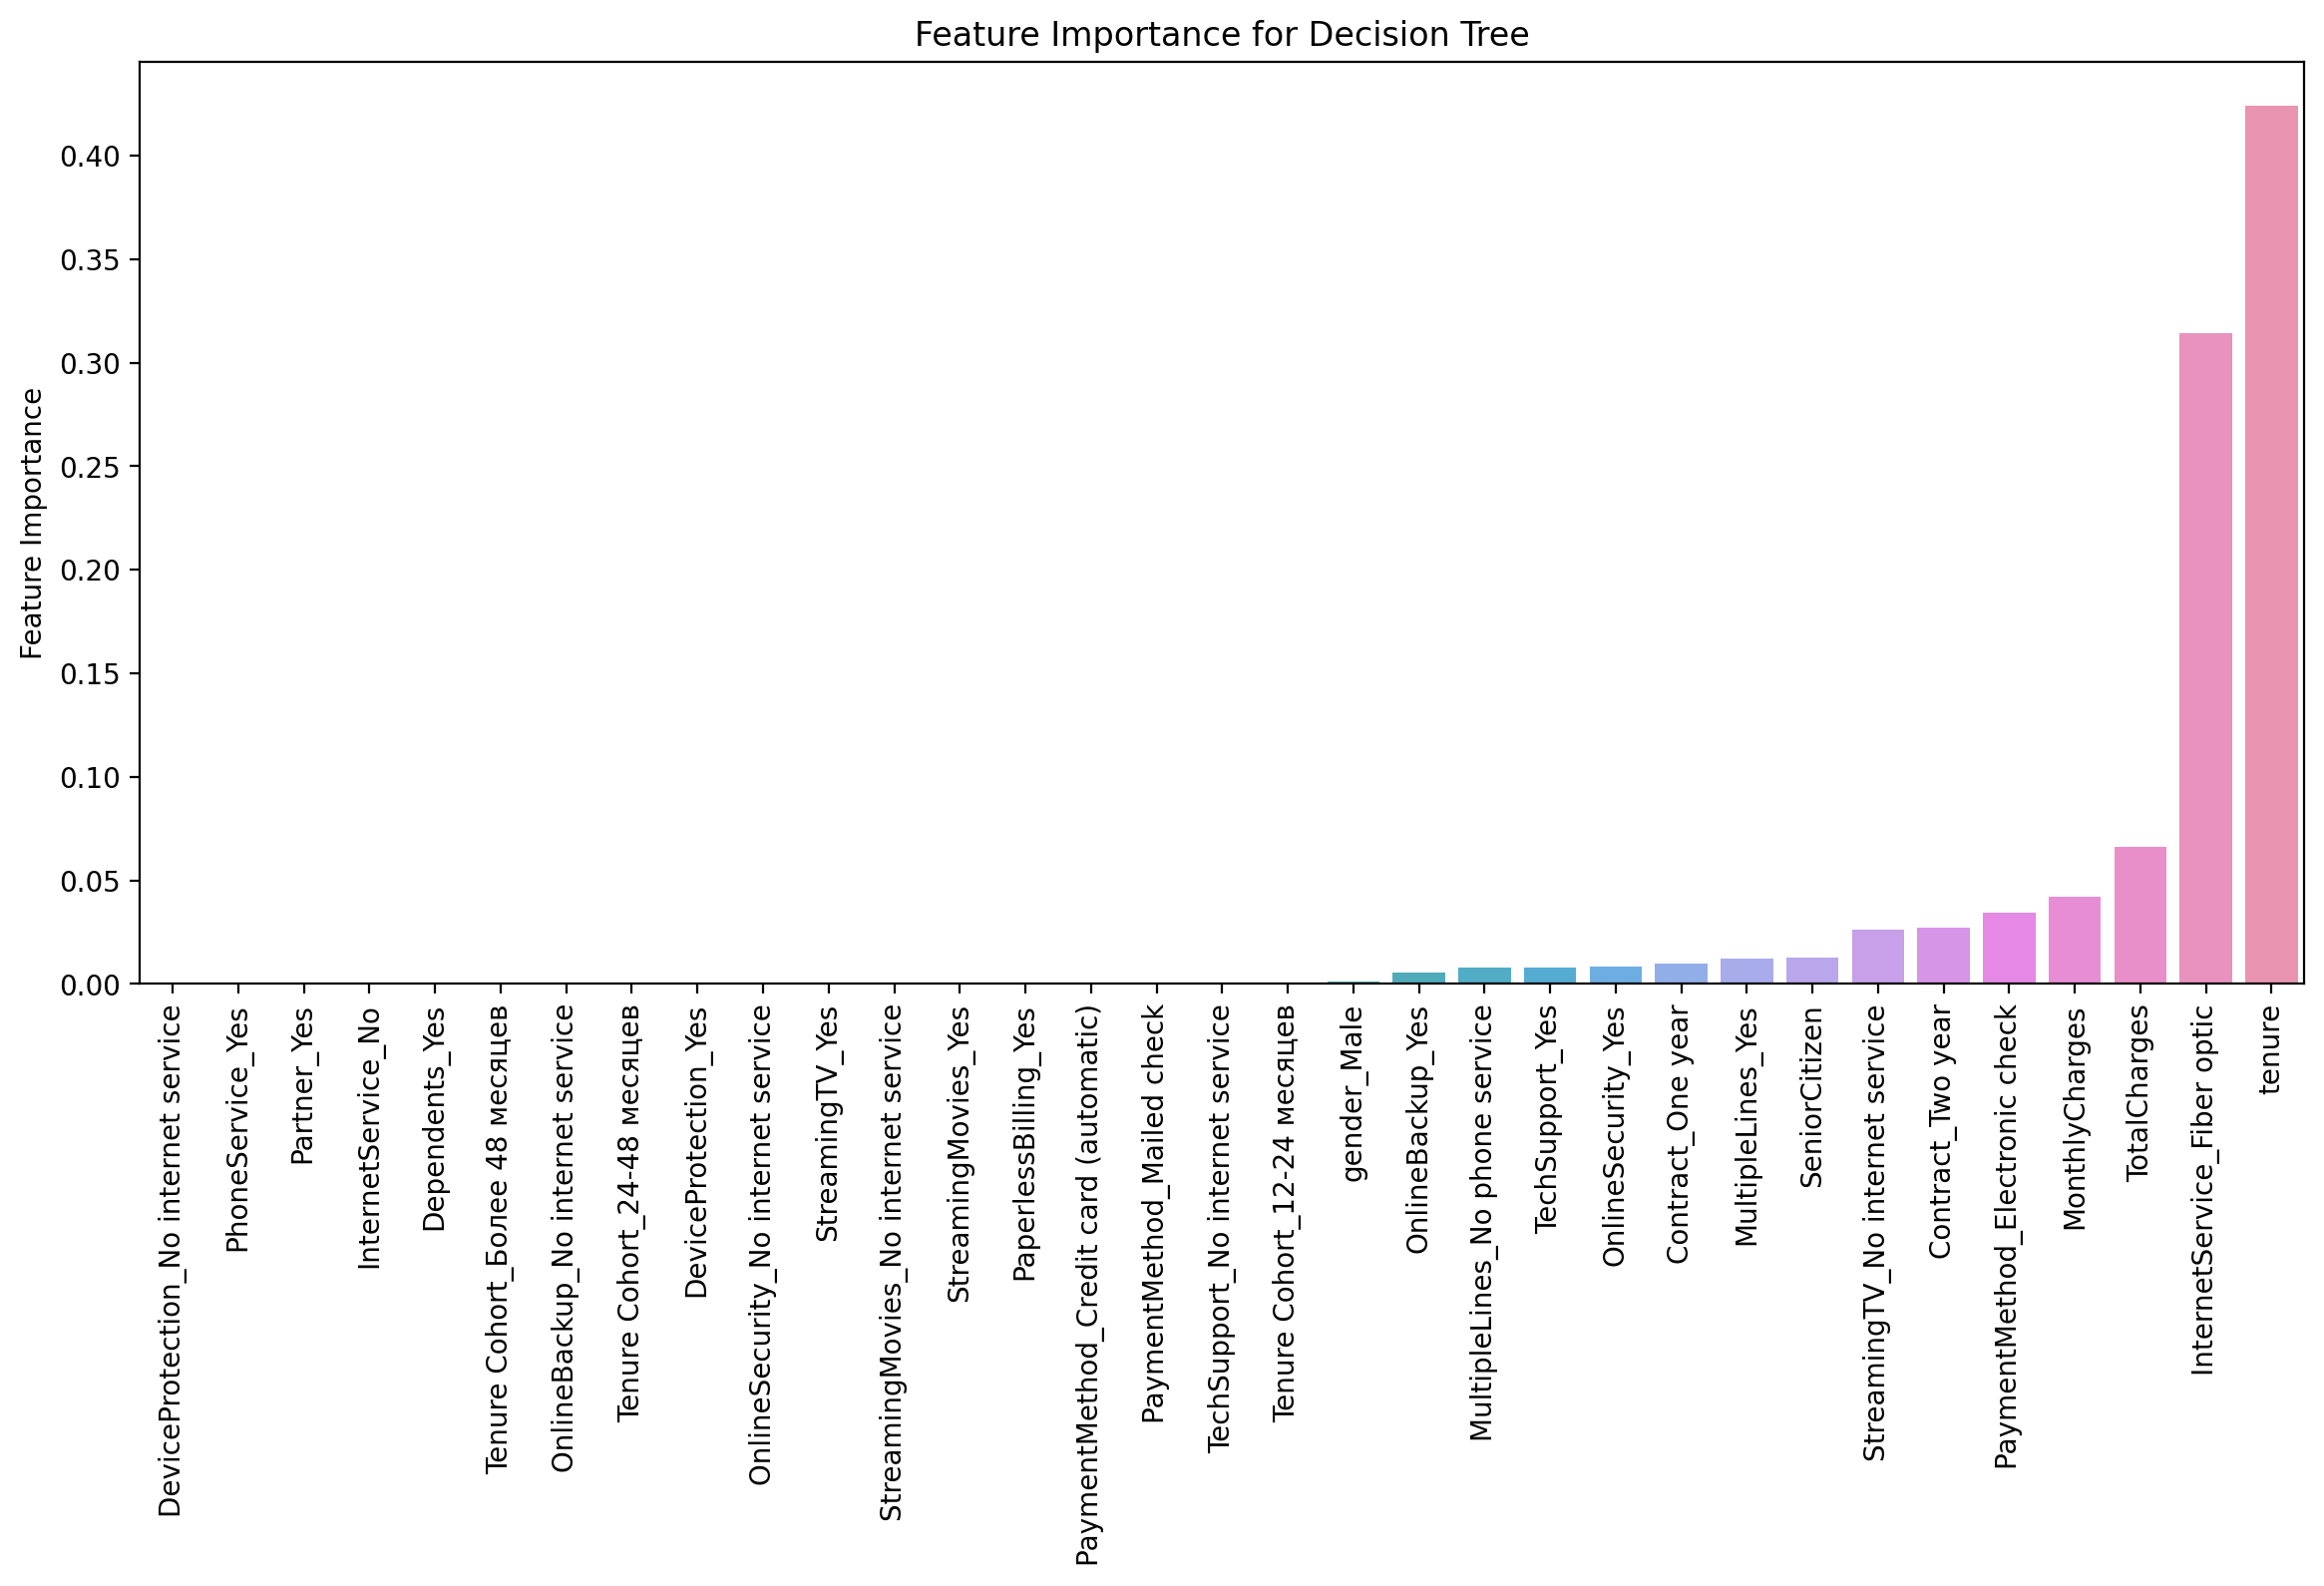

In [95]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [96]:
from sklearn.tree import plot_tree

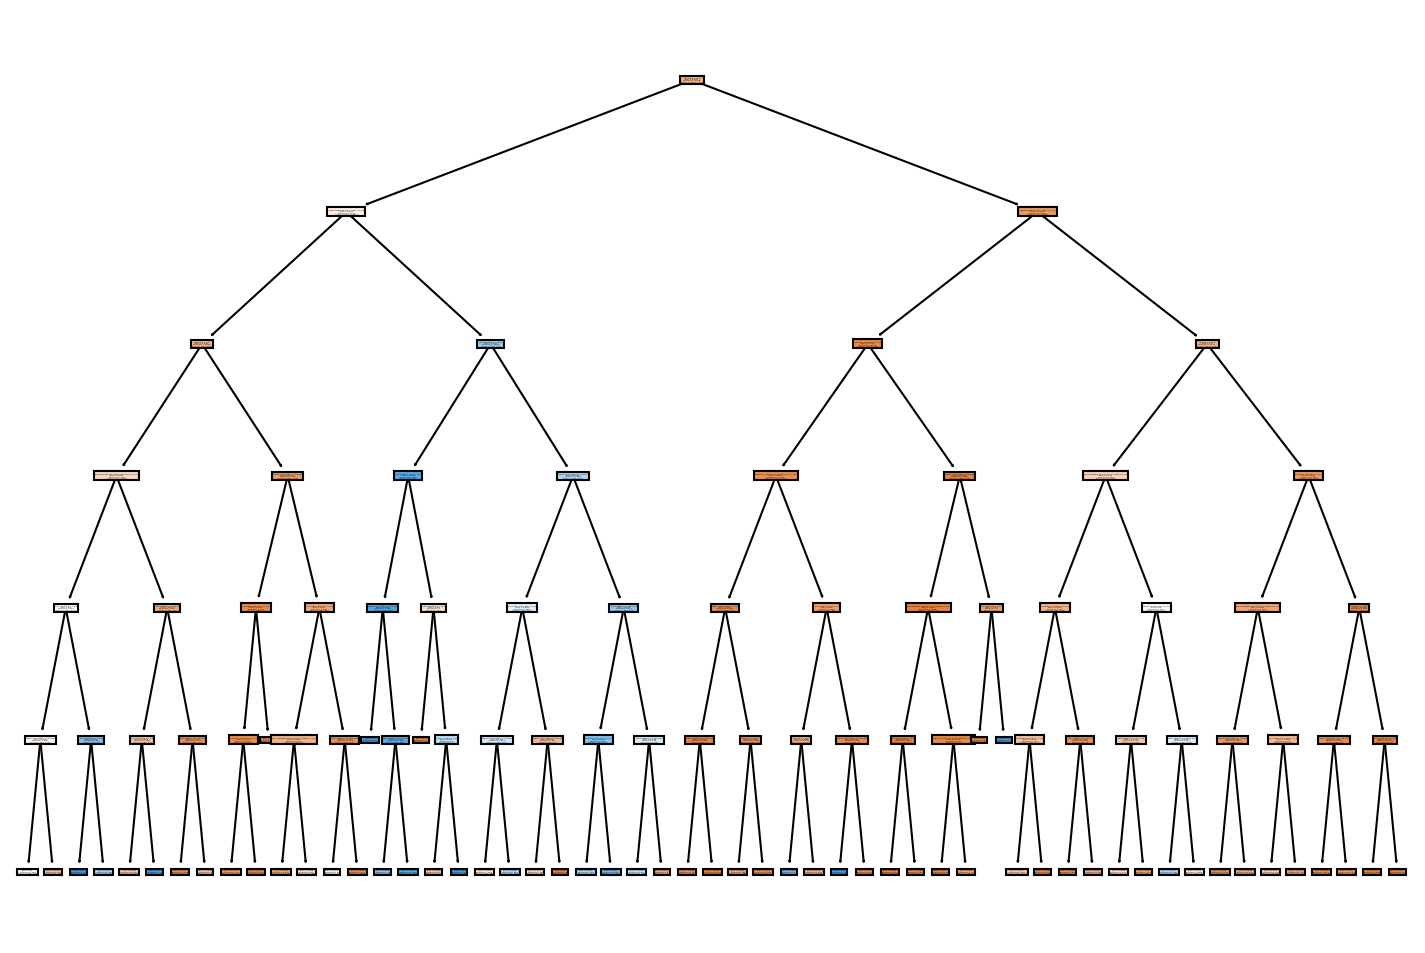

In [98]:
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(model, filled=True, feature_names=X.columns, class_names=model.classes_)
plt.show()

## Случайный лес (Random Forest)


In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=100)

In [42]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
pred = rf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.51      0.45      0.48       147

    accuracy                           0.79       704
   macro avg       0.68      0.67      0.67       704
weighted avg       0.79      0.79      0.79       704



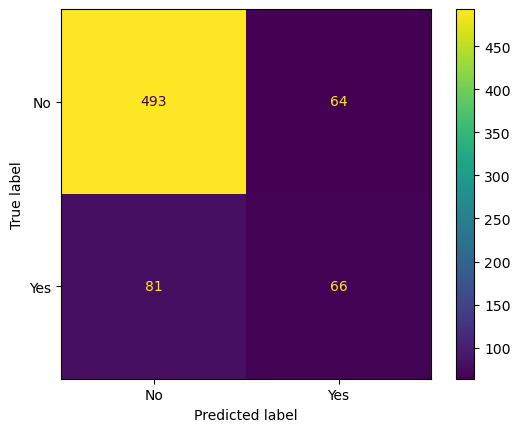

In [103]:
cmm = confusion_matrix(y_test, pred)
display_labels = ["No", "Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix=cmm,display_labels=display_labels)
disp.plot()

## Расширяемые деревья (Boosted Trees)


In [43]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [44]:
ad = AdaBoostClassifier()

In [45]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [47]:
ab_pred = ad.predict(X_test)
print(classification_report(y_test,ab_pred))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



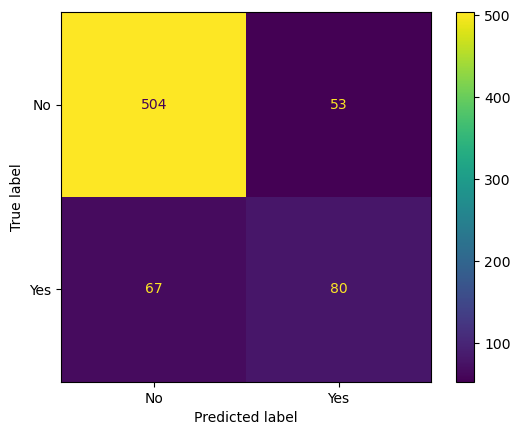

In [48]:
acm = confusion_matrix(y_test, ab_pred)
display_labels = ["No", "Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix=acm,display_labels=display_labels)
disp.plot()

#### Получились наилучшие результаты в модели AdaBoostClassifier, но не был выполнен поиск по сетке grid search,и в целом модели показывали очень похожие результаты на этих данных.